

### ***1.   Solution du probleme Bin packing avec les heuristiques***

**Equipe 04:**


*   Semcheddine Ikram
*   Sekkai Maria
*   Heddadji Nourelimane
*   Soltani Meriem
*   Taib Selma
*   Zerouki Selma
*   Mohamed mahmoud aref Zeinebou










# **1. Max-Rest**




Nous itérons sur tous les objets de 1 à n. Si l'objet i s'adapte dans le bac en haut de la file de priorité, nous retirons ce bac de la file, ajoutons l'objet i à ce bac, puis replaçons le bac mis à jour dans la file de priorité. Si l'objet i ne rentre dans aucun bac existant, nous créons un nouveau bac et y plaçons l'objet i.

In [2]:
import heapq

In [1]:
class Object:
    def __init__(self, number, weight):
        self.number = number
        self.weight = weight

In [3]:
class Bin:
    def __init__(self, capacity):
        self.capacity = capacity
        self.current_capacity = capacity
        self.objects = []

    def add_object(self, obj):
        if self.current_capacity >= obj.weight:
            self.objects.append(obj)
            self.current_capacity -= obj.weight
            return True
        return False

    def is_empty(self):
        return len(self.objects) == 0

    def __lt__(self, other):
        # Compare bins based on their remaining capacity
        return self.current_capacity > other.current_capacity

In [ ]:
def max_rest_priority_queue(objects, bin_capacity):
    bins = []
    # Start with one bin
    heapq.heappush(bins, Bin(bin_capacity))

    for obj in objects:
        top_bin = heapq.heappop(bins)
        if top_bin.add_object(obj):
            # If successful, push the updated bin back into the queue
            heapq.heappush(bins, top_bin)

        else:
            # If the top-most bin is full, create a new bin and add the object
            heapq.heappush(bins, top_bin)
            new_bin = Bin(bin_capacity)
            new_bin.add_object(obj)
            heapq.heappush(bins, new_bin)

    # Remove empty bins
    bins = [bin for bin in bins]

    return bins


In the BPP format:
  Number of items (n)
  Capacity of the bins (c)
  For each item j (j = 1,...,n):
  Weight (wj)

In [4]:
def read_bin_packing_file(file_path):
    # Ouverture du fichier en mode lecture
    with open(file_path, "r") as file:
        # Lecture du nombre d'objets et de la taille de la boîte à partir des premières lignes du fichier
        num_objects = int(file.readline().strip())
        box_size = int(file.readline().strip())
        # Lecture des tailles des objets à partir des lignes restantes du fichier
        obj_sizes = [int(line.strip()) for line in file]

    return num_objects, box_size, obj_sizes


In [5]:
# Chemin du fichier contenant les données du problème
file_path = "/content/BPP_100_750_0.1_0.7_0.txt"
# Lecture du fichier pour obtenir les données du problème
num_objects, bin_capacity, weights = read_bin_packing_file(file_path)
print(weights)
objects = [Object(i, weight) for i, weight in enumerate(weights, start=1)]
#for obj in objects:
   # print(f"Object number: {obj.number}, weight: {obj.weight}")
print("The number of objects , bin_size :")
print(num_objects,bin_capacity)

[524, 512, 512, 508, 508, 505, 499, 499, 485, 480, 470, 466, 466, 460, 455, 447, 439, 435, 433, 431, 420, 414, 412, 410, 408, 406, 397, 395, 393, 388, 383, 374, 363, 358, 358, 357, 356, 355, 351, 345, 342, 335, 325, 280, 278, 278, 278, 271, 267, 263, 262, 258, 253, 253, 249, 245, 242, 233, 224, 217, 214, 209, 209, 207, 207, 205, 205, 203, 202, 201, 201, 192, 178, 177, 174, 174, 172, 172, 167, 164, 157, 157, 155, 151, 150, 147, 146, 145, 142, 141, 136, 131, 117, 113, 111, 103, 90, 85, 83, 75]
The number of objects , bin_size :
100 750


In [ ]:
import time
start_time = time.time()
bins = max_rest_priority_queue(objects, bin_capacity)
end_time = time.time()
# Calcul du temps d'exécution
elapsed_time = end_time - start_time
print("time", elapsed_time)
print(f"Number of bins: {len(bins)}")
for i, bin in enumerate(bins, start=1):
    print(f"Bin {i}: {[obj.number for obj in bin.objects]}")


time 0.00017833709716796875
Number of bins: 24
Bin 1: [49, 50]
Bin 2: [11, 36]
Bin 3: [16, 32]
Bin 4: [10, 37]
Bin 5: [8, 40]
Bin 6: [3, 42]
Bin 7: [6, 39]
Bin 8: [7, 41]
Bin 9: [9, 38]
Bin 10: [12, 35]
Bin 11: [2, 45]
Bin 12: [4, 43]
Bin 13: [14, 33]
Bin 14: [1, 46, 47]
Bin 15: [5, 44, 48]
Bin 16: [15, 30]
Bin 17: [18, 29]
Bin 18: [19, 28]
Bin 19: [22, 27]
Bin 20: [20, 26]
Bin 21: [21, 25]
Bin 22: [23, 24]
Bin 23: [17, 31]
Bin 24: [13, 34]


In [ ]:
import matplotlib.pyplot as plt
#visualizing

In [ ]:
# Function to run the experiment for different numbers of objects
def run_experiment(file_path, num_objects_list):
    num_bins_list = []
    execution_time_list = []

    for num_objects in num_objects_list:
        # Read the file and get the object weights
        num_objects_in_file, bin_capacity, weights = read_bin_packing_file(file_path)
        # Take the first num_objects weights
        objects = [Object(i, weight) for i, weight in enumerate(weights[:num_objects], start=1)]

        # Run the algorithm and record the number of bins used
        start_time = time.time()
        bins = max_rest_priority_queue(objects, bin_capacity)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_time_list.append(execution_time)
        num_bins_list.append(len(bins))

    return num_bins_list,execution_time_list


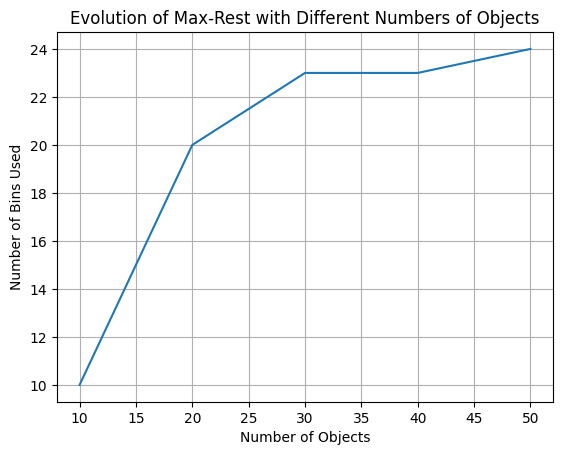

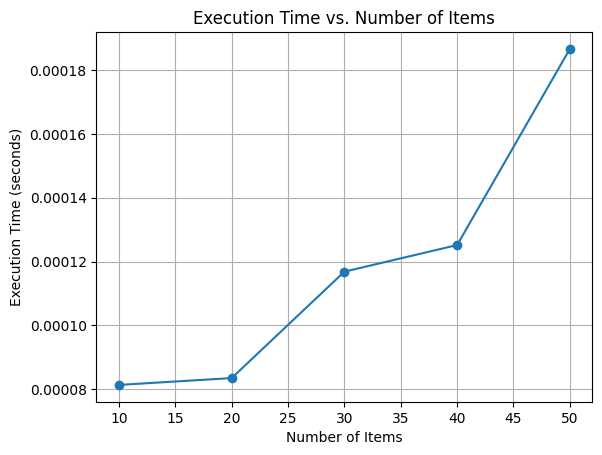

In [ ]:
num_objects_list = [10, 20, 30, 40, 50]

# Define the path to the file containing the data
file_path = "BPP_50_50_0.1_0.7_0.txt"

# Run the experiment
num_bins_list , execution_time_list = run_experiment(file_path, num_objects_list)

# Plot the results
plt.plot(num_objects_list, num_bins_list)
plt.xlabel('Number of Objects')
plt.ylabel('Number of Bins Used')
plt.title('Evolution of Max-Rest with Different Numbers of Objects')
plt.grid(True)
plt.show()

plt.plot(num_objects_list, execution_time_list, marker='o')
plt.xlabel('Number of Items')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs. Number of Items')
plt.grid(True)
plt.show()

# **2. Best-fit with heapq**

Nous itérons sur tous les objets de 1 à n. Si l'objet i s'adapte dans le bac optimal trouvé par une recherche en largeur dans le tas, nous l'ajoutons à ce bac. Sinon, s'il n'y a pas de bac adapté, nous en ouvrons un nouveau et y plaçons l'objet i.

In [6]:
def bfs_heap(bins, obj):
    # Perform a Breadth-First Search to determine the best bin
    best_bin_index = None
    min_remaining_capacity = float('inf')

    # Iterate over each bin in the heap
    for i in range(len(bins)):
        remaining_capacity = bins[i].current_capacity - obj.weight
        if remaining_capacity >= 0 and remaining_capacity < min_remaining_capacity:
            min_remaining_capacity = remaining_capacity
            best_bin_index = i

    if best_bin_index is not None:
        # Pack the object in the best bin found
        bins[best_bin_index].add_object(obj)
        # Restore the heap property after adding the object
        heapq._siftdown(bins, 0, best_bin_index)
        return True
    return False

In [7]:
def best_fit_heap_bin_packing(objects, bin_capacity):
    bins = []
    # Start with one bin
    heapq.heappush(bins, Bin(bin_capacity))

    for obj in objects:
        # Perform BFS to determine the best bin for the current object
        if not bfs_heap(bins, obj):
            # If no bin can accommodate the object, open a new bin
            new_bin = Bin(bin_capacity)
            new_bin.add_object(obj)
            heapq.heappush(bins, new_bin)

    # Remove empty bins
    bins = [bin for bin in bins if not bin.is_empty()]

    return bins

In [8]:
def read_bin_packing_file(file_path):
    with open(file_path, "r") as file:
        num_objects = int(file.readline().strip())
        bin_capacity = int(file.readline().strip())
        weights = [int(line.strip()) for line in file]

    return num_objects, bin_capacity, weights

In [13]:
file_path = "/content/BPP_750_500_0.1_0.7_0.txt"
num_objects, bin_capacity, weights = read_bin_packing_file(file_path)
objects = [Object(i, weight) for i, weight in enumerate(weights, start=1)]
print("The number of objects , bin_size :")
print(num_objects,bin_capacity)

The number of objects , bin_size :
750 500


In [14]:
import time
start_time = time.time()
bins = best_fit_heap_bin_packing(objects, bin_capacity)
end_time = time.time()
elapsed_time = end_time - start_time

print("Execution time:", elapsed_time)
print("Number of bins:", len(bins))
for i, bin in enumerate(bins, start=1):
    print(f"Bin {i}: {[obj.number for obj in bin.objects]}")

Execution time: 0.03558516502380371
Number of bins: 297
Bin 1: [744, 745, 746, 747, 748, 749, 750]
Bin 2: [733, 734, 735, 736, 737, 738, 741, 742, 743]
Bin 3: [519, 520, 521, 704]
Bin 4: [725, 726, 727, 728, 729, 730, 731, 732]
Bin 5: [23, 499]
Bin 6: [210, 317]
Bin 7: [514, 515, 518, 713]
Bin 8: [642, 643, 645, 646, 647]
Bin 9: [714, 715, 717, 718, 719, 721, 722, 723]
Bin 10: [164, 313]
Bin 11: [163, 312]
Bin 12: [198, 286]
Bin 13: [212, 301]
Bin 14: [227, 355]
Bin 15: [511, 512, 513, 724]
Bin 16: [564, 565, 566, 567]
Bin 17: [637, 638, 639, 640, 641]
Bin 18: [706, 707, 708, 709, 710, 711, 712]
Bin 19: [141, 339]
Bin 20: [17, 492]
Bin 21: [165, 314]
Bin 22: [183, 275]
Bin 23: [22, 493]
Bin 24: [110, 367]
Bin 25: [194, 287]
Bin 26: [19, 500]
Bin 27: [211, 295]
Bin 28: [109, 383]
Bin 29: [228, 356]
Bin 30: [397, 402, 544]
Bin 31: [482, 483, 510]
Bin 32: [532, 533, 534, 658]
Bin 33: [559, 561, 562, 563]
Bin 34: [596, 597, 598, 599, 739]
Bin 35: [632, 633, 634, 635, 636]
Bin 36: [681, 682

In [ ]:
def run_experiment(file_path, num_objects_list):
    num_bins_list = []
    execution_time_list = []
    for num_objects in num_objects_list:
        # Read the file and get the object weights
        num_objects_in_file, bin_capacity, weights = read_bin_packing_file(file_path)
        # Take the first num_objects weights
        objects = [Object(i, weight) for i, weight in enumerate(weights[:num_objects], start=1)]

        # Run the algorithm and record the number of bins used
        start_time = time.time()
        bins = best_fit_heap_bin_packing(objects, bin_capacity)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_time_list.append(execution_time)
        num_bins_list.append(len(bins))

    return num_objects_list, num_bins_list , execution_time_list

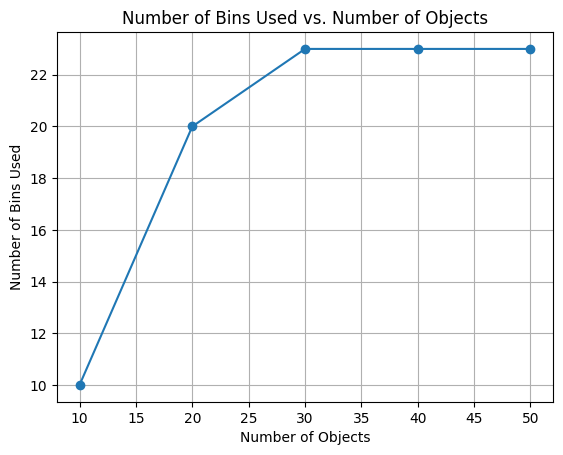

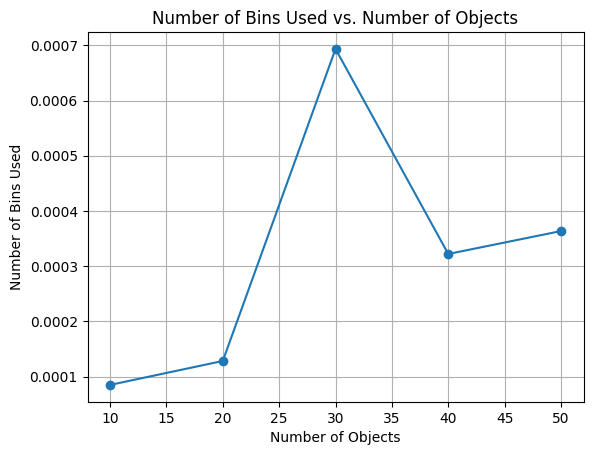

In [ ]:
# Define the range of number of objects you want to experiment with
num_objects_list = [10, 20, 30, 40, 50]

file_path = "BPP_50_50_0.1_0.7_0.txt"

# Run the experiment
num_objects_list, num_bins_list, execution_time_list= run_experiment(file_path, num_objects_list)

# Plot the results
plt.plot(num_objects_list, num_bins_list, marker='o')
plt.xlabel('Number of Objects')
plt.ylabel('Number of Bins Used')
plt.title('Number of Bins Used vs. Number of Objects')
plt.grid(True)
plt.show()

# Plot the results
plt.plot(num_objects_list, execution_time_list, marker='o')
plt.xlabel('Number of Objects')
plt.ylabel('execution_time_list')
plt.title('execution_time_list vs. Number of Objects')
plt.grid(True)
plt.show()



# **3. Best-fit avec amélioration**

cet algorithme utilise une approche de type "Best Fit" pour placer chaque article dans le bac qui minimise le gaspillage d'espace donc avec la petite capacité restante dans chaque bac. Ensuite, il optimise la répartition en fusionnant les bacs lorsque cela est possible avec amélioration

In [ ]:
import random
import time

In [ ]:
class Bin:
    def __init__(self, capacity):
        self.capacity = capacity  # Capacité maximale du bac
        self.items = []  # Liste des articles dans le bac

    def add_item(self, item):
        self.items.append(item)  # Ajout d'un article au bac
        self.capacity -= item  # Mise à jour de la capacité restante du bac

In [ ]:
def construct_bin_packing_best_fit(items, container_capacity):
    bins = []  # Liste des bacs utilisés

    # Parcours de tous les articles à placer
    for item in items:
        best_bin = None
        min_remaining_capacity = float('inf')

        # Parcours de tous les bacs existants pour trouver le meilleur bac pour l'article
        for bin in bins:
            remaining_capacity = bin.capacity - item
            # Vérification si le bac a assez de capacité pour contenir l'article et si sa capacité restante est la plus petite
            if remaining_capacity >= 0 and remaining_capacity < min_remaining_capacity:
                best_bin = bin
                min_remaining_capacity = remaining_capacity

        # Si un bac approprié est trouvé, ajoutez l'article à ce bac, sinon, créez un nouveau bac
        if best_bin is not None:
            best_bin.add_item(item)
        else:
            new_bin = Bin(container_capacity)  # Création d'un nouveau bac
            new_bin.add_item(item)  # Ajout de l'article au nouveau bac
            bins.append(new_bin)  # Ajout du nouveau bac à la liste des bacs

    return bins  # Retourne la liste des bacs utilisés


In [ ]:
def optimize_bin_packing(bins):
    optimized = True
    # Boucle jusqu'à ce qu'aucune amélioration ne puisse être effectuée
    while optimized:
        optimized = False
        # Parcours de tous les bacs
        for i in range(len(bins)):
            # Parcours de tous les bacs suivants
            for j in range(i+1, len(bins)):
                # Fusionne deux bacs si leur somme d'articles est inférieure ou égale à la capacité du premier bac
                if sum(bins[i].items) + sum(bins[j].items) <= bins[i].capacity:
                    bins[i].items.extend(bins[j].items)  # Fusion des articles des deux bacs
                    del bins[j]  # Suppression du deuxième bac fusionné
                    optimized = True  # Marque que l'optimisation a été effectuée
                    break
            if optimized:
                break

    return len(bins)  # Retourne le nombre de bacs utilisés après l'optimisation

In [ ]:
def main():

    items = [35, 35, 34, 34, 34, 33, 33, 33, 32, 31, 31, 30, 30, 29, 28, 28, 28, 27, 26, 26, 26, 26, 25, 25, 22, 22, 21, 20, 18, 18, 16, 16, 16, 16, 16, 13, 13, 13, 12, 11, 11, 10, 10, 9, 9, 7, 7, 7, 7, 5]  # Liste des articles avec leurs poids
    container_capacity = 50  # Capacité maximale d'un bac

    start_time = time.time()  # Enregistrement du temps de début de l'exécution
    bins = construct_bin_packing_best_fit(items, container_capacity)  # Construction des bacs initiaux en utilisant Best Fit
    num_containers = optimize_bin_packing(bins)  # Optimisation des bacs
    end_time = time.time()  # Enregistrement du temps de fin de l'exécution

    # Affichage des résultats
    print("Nombre de conteneurs utilisés:", num_containers)
    print("Temps d'exécution:", end_time - start_time, "secondes")


In [ ]:
if __name__ == "__main__":
    main()  # Appel de la fonction principale

Nombre de conteneurs utilisés: 23
Temps d'exécution: 0.0004258155822753906 secondes


In [ ]:
def run_experiment(num_items_list, container_capacity):
    num_bins_list = []

    for num_items in num_items_list:
        # Generate random items
        items = [random.randint(1, container_capacity) for _ in range(num_items)]

        # Run the algorithm and record the number of bins used
        bins = construct_bin_packing_best_fit(items, container_capacity)
        num_bins = optimize_bin_packing(bins)
        num_bins_list.append(num_bins)

    return num_bins_list

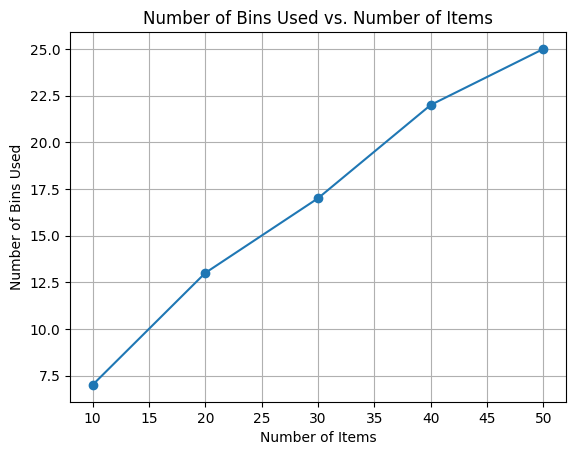

In [ ]:
num_items_list = [10, 20, 30, 40, 50]  # Define the range of numbers of items you want to experiment with
container_capacity = 50  # Capacité maximale d'un bac

    # Run the experiment
num_bins_list = run_experiment(num_items_list, container_capacity)

    # Plot the results
plt.plot(num_items_list, num_bins_list, marker='o')
plt.xlabel('Number of Items')
plt.ylabel('Number of Bins Used')
plt.title('Number of Bins Used vs. Number of Items')
plt.grid(True)
plt.show()

In [ ]:
def run_experiment(num_items_list, container_capacity):
    execution_time_list = []

    for num_items in num_items_list:
        # Generate random items
        items = [random.randint(1, container_capacity) for _ in range(num_items)]

        # Record the start time
        start_time = time.time()

        # Run the algorithm
        bins = construct_bin_packing_best_fit(items, container_capacity)
        num_bins = optimize_bin_packing(bins)

        # Record the end time
        end_time = time.time()

        # Calculate the execution time
        execution_time = end_time - start_time
        execution_time_list.append(execution_time)

    return execution_time_list


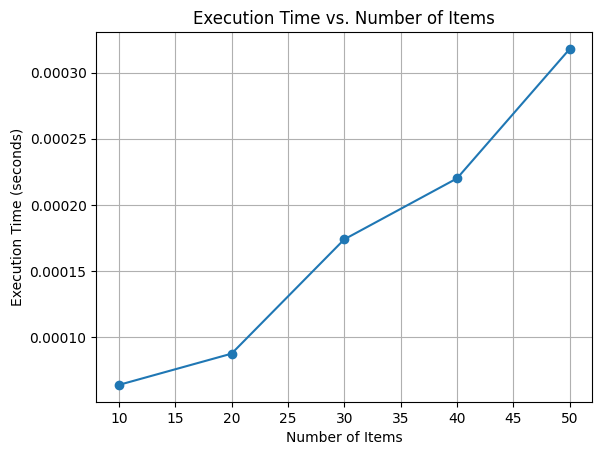

In [ ]:
num_items_list = [10, 20, 30, 40, 50]  # Define the range of numbers of items you want to experiment with
container_capacity = 50  # Capacité maximale d'un bac

    # Run the experiment
execution_time_list = run_experiment(num_items_list, container_capacity)

    # Plot the results
plt.plot(num_items_list, execution_time_list, marker='o')
plt.xlabel('Number of Items')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs. Number of Items')
plt.grid(True)
plt.show()

***Interprétation:***

Une augmentation linéaire ou légèrement quadratique du temps d'exécution avec le nombre d'objets peut indiquer une complexité temporelle raisonnable de l'algorithme.par contre a l'augmentation exponentielle du temps d'excution avec la méthode exacte Branch and Bound.

Une augmentation lineaire du nombre de bacs avec le nombre d'objets indique une répartition plus fine des objets dans les bacs.
Pour Next-fit heapq le nombre de bacs reste constant malgré l'augmentation du nombre d'objets, cela peut suggérer que cet algorithme trouve une solution optimale ou une limite supérieure dans la capacité des bacs.

***Analyse et conclusion: ***

L'utilisation de la méthode exacte de branch and bound pour résoudre le problème du bin packing garantit une solution optimale en explorant systématiquement l'ensemble des solutions possibles. Cependant, cette approche peut devenir rapidement inefficace pour des instances de problème de taille importante en raison de la complexité exponentielle de la recherche.

En revanche, les heuristiques fournissent des solutions rapidement, mais ne garantissent pas l'optimalité. Elles sont souvent utilisées pour des instances de problème de grande taille où la recherche exhaustive n'est pas praticable dans un temps raisonnable